# Project 3 : Openfoodfacts (notebook d'exploration)

Matthieu cazier 

Dans ce notebook nous alons nous concentrer sur les analyses des variables ainsi que sur quelques tests statistiques. Il se déroule en 4 parties :
<ul>
<li>Récupérer les données
<li>Analyses des variables (univarié/multivarié/cercle de corrélation/Pairplot/heatmap) 
<li>Tests Statistiques (shapiro / anova / mannwhitney / regression linéaire)
<li>Prédictions 
</ul>

### On récupère le dataset du notebook nettoyage

In [2]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
dataframe = pd.read_csv('df.csv')

In [4]:
df = dataframe.copy()

In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
#Nombre de valeur manquante
def num_missing(df):
    return sum(df.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeursmanquantes par colonne:")
print(df.apply(num_missing, axis=0))

Valeursmanquantes par colonne:
energy_kcal         0
energy              0
fat                 0
saturated_fat       0
carbohydrates       0
sugars              0
proteins            0
salt                0
sodium              0
nutrition_score     0
nutriscore_grade    0
dtype: int64


### On commence les Analyses

#### Analyse univarié

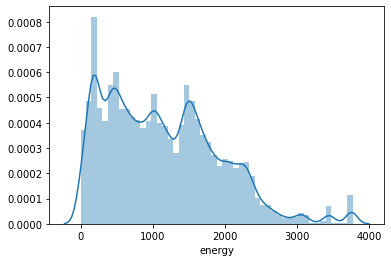

In [7]:
sns.distplot(df['energy'])

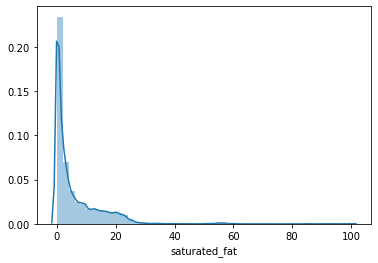

In [8]:
sns.distplot(df['saturated_fat'])

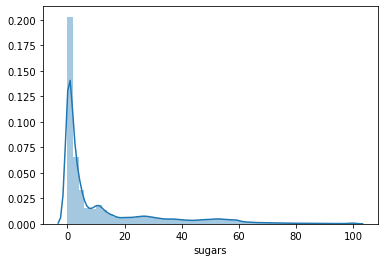

In [9]:
sns.distplot(df['sugars'])

#### Analyse multivarié

In [88]:
a_df = df[df['nutriscore_grade'] == 'a']
b_df = df[df['nutriscore_grade'] == 'b']
c_df = df[df['nutriscore_grade'] == 'c']
d_df = df[df['nutriscore_grade'] == 'd']
e_df = df[df['nutriscore_grade'] == 'e']

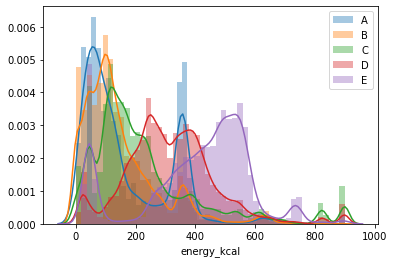

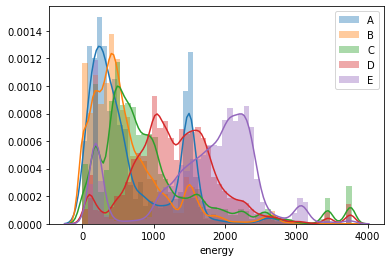

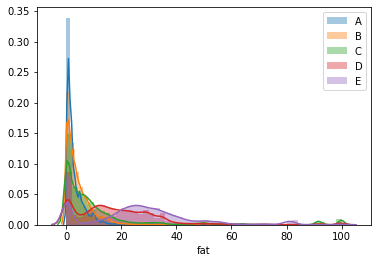

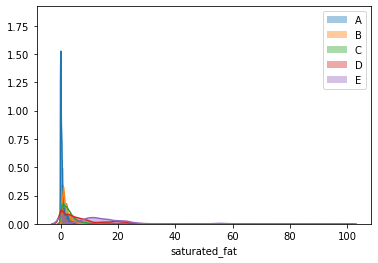

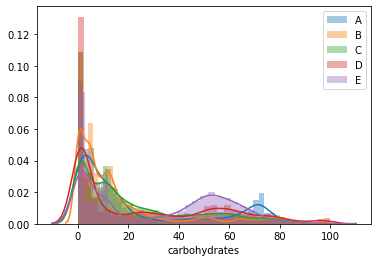

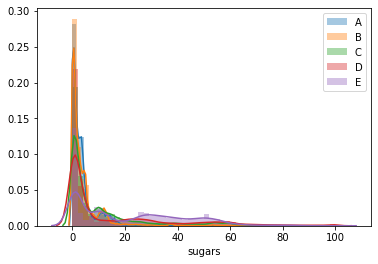

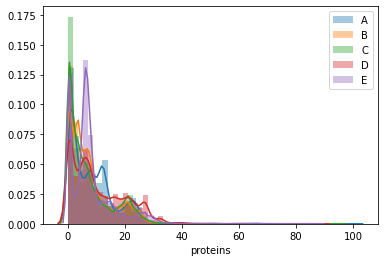

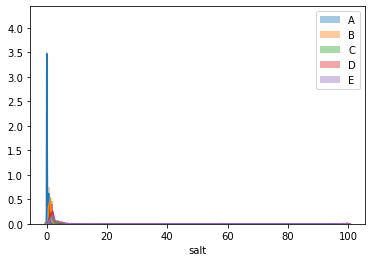

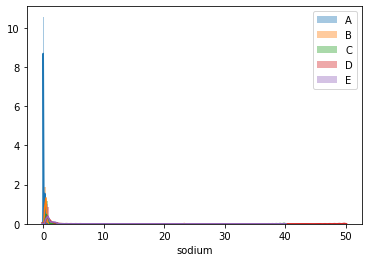

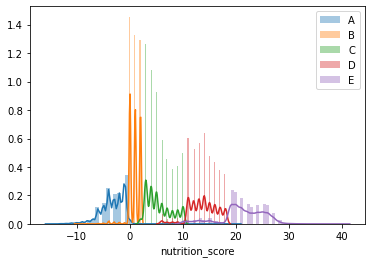

In [89]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(a_df[col], label='A')
    sns.distplot(b_df[col], label='B')
    sns.distplot(c_df[col], label='C')
    sns.distplot(d_df[col], label='D')
    sns.distplot(e_df[col], label='E')
    plt.legend()

#### Cercle de corrélation

In [90]:
from mlxtend.plotting import plot_pca_correlation_graph


(182112, 6)


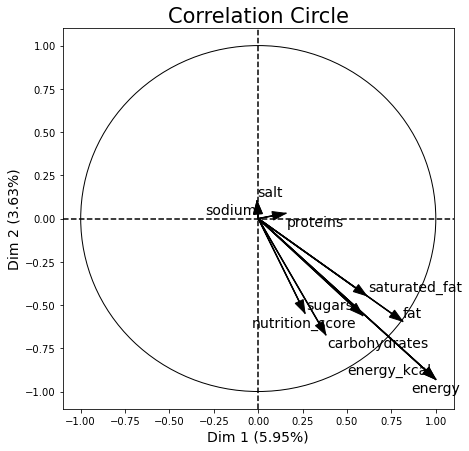

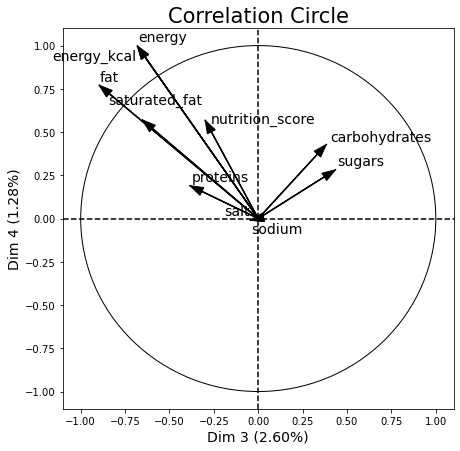

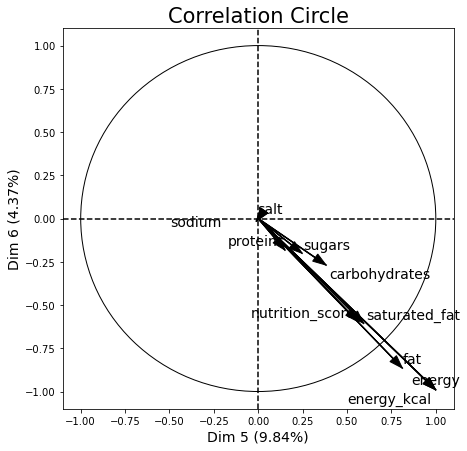

In [168]:
X = df.drop(['nutriscore_grade'],axis=1)
y = df['nutriscore_grade']

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended

feature_names = [
  'energy_kcal',
  'energy',
  'fat',
  'saturated_fat','carbohydrates','sugars','proteins','salt','sodium','nutrition_score']

X_proj = pca.transform(X)
print(X_proj.shape)
figure, correlation_matrix = \
     plot_pca_correlation_graph(X = X,
                                variables_names = feature_names,
                                dimensions = (1, 2),
                                figure_axis_size = 7,
                                X_pca = X_proj[:,0:2],
                                explained_variance = pca.explained_variance_ratio_[0:2])

figure, correlation_matrix = \
     plot_pca_correlation_graph(X = X,
                                variables_names = feature_names,
                                dimensions=(3, 4),
                                figure_axis_size=7,
                                X_pca = X_proj[:,0:4],
                                explained_variance = pca.explained_variance_ratio_[0:4])

figure, correlation_matrix = \
     plot_pca_correlation_graph(X = X,
                                variables_names = feature_names,
                                dimensions=(5, 6),
                                figure_axis_size=7,
                                X_pca = X_proj[:,0:6],
                                explained_variance = pca.explained_variance_ratio_[0:6])


#### Pairplot

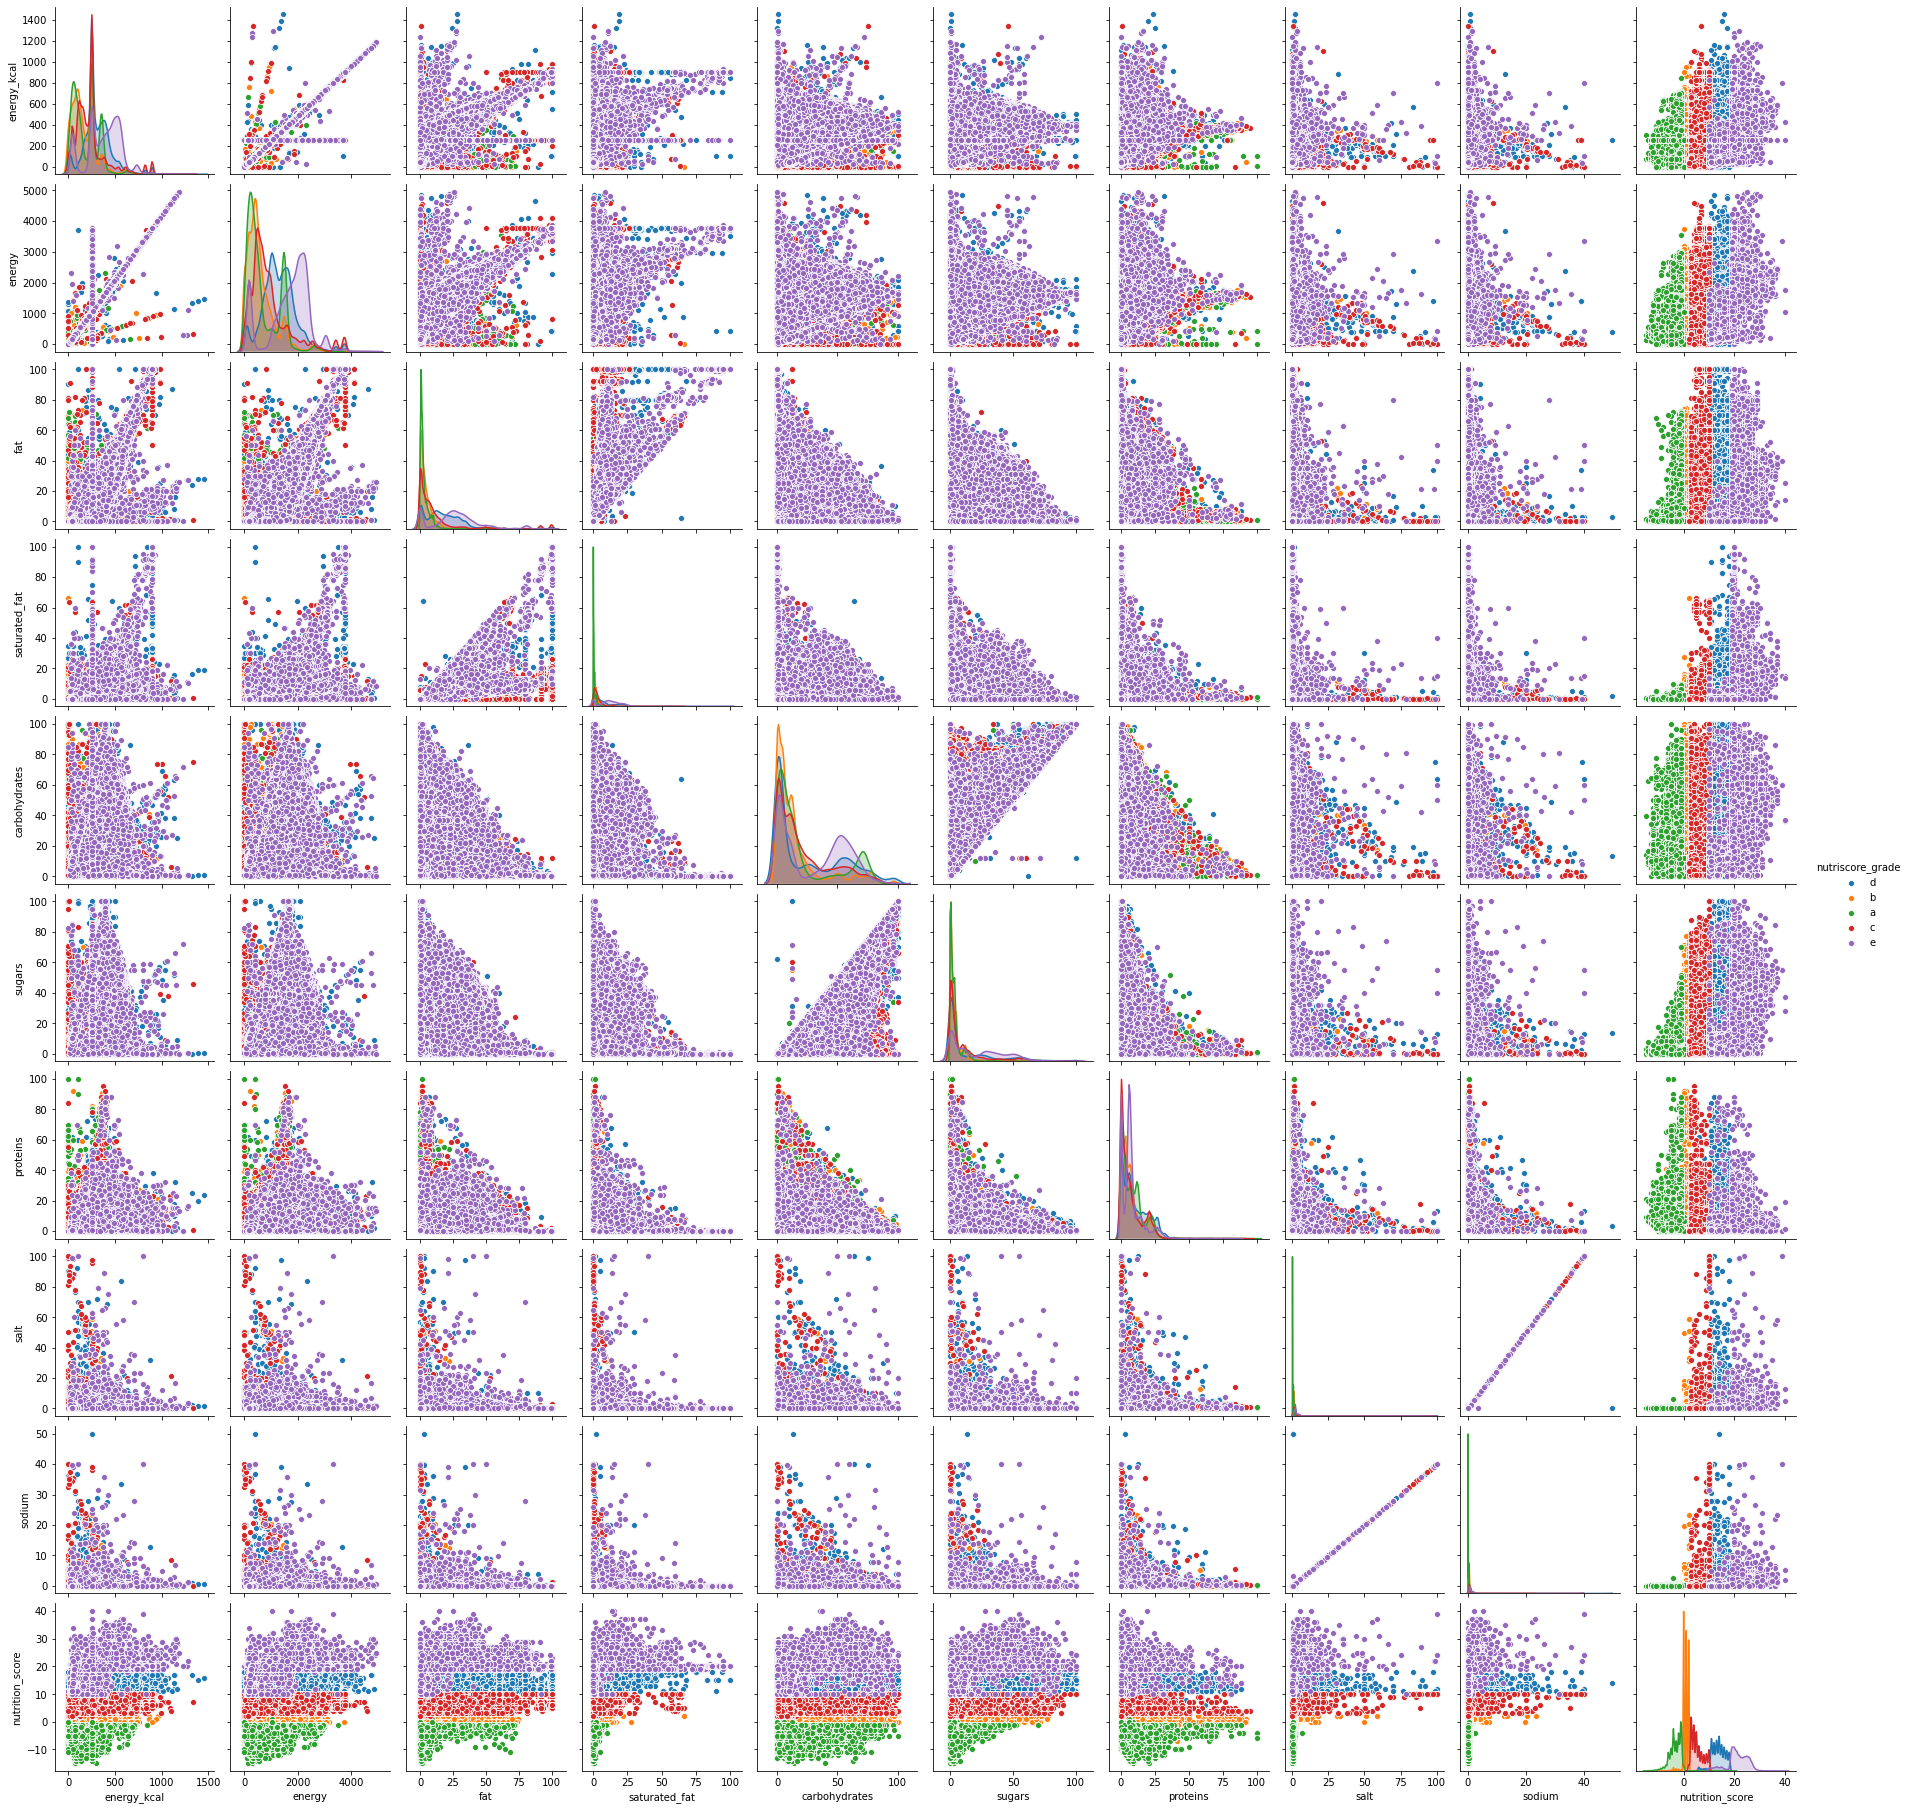

In [16]:
sns.pairplot(df,hue="nutriscore_grade")

Analyse du pairplot : 
<ul>
<li>le sels et le sodium font qu'une ligne, il y donc une  corrélation parfaite 
<li>nutrition-score est notre targuet 
<li>Saturated fat, energy, fat,sugars  augmentent avec le nutri-score (variables intéressantent)
<li>carbohydrates, proteins n'ont pas l'air d'avoir de corrélation avec le nutri-score
</ul>

#### Heatmap corrélation

[Text(0.5, 0, 'energy_kcal'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'fat'),
 Text(3.5, 0, 'saturated_fat'),
 Text(4.5, 0, 'carbohydrates'),
 Text(5.5, 0, 'sugars'),
 Text(6.5, 0, 'proteins'),
 Text(7.5, 0, 'salt'),
 Text(8.5, 0, 'sodium'),
 Text(9.5, 0, 'nutrition_score')]

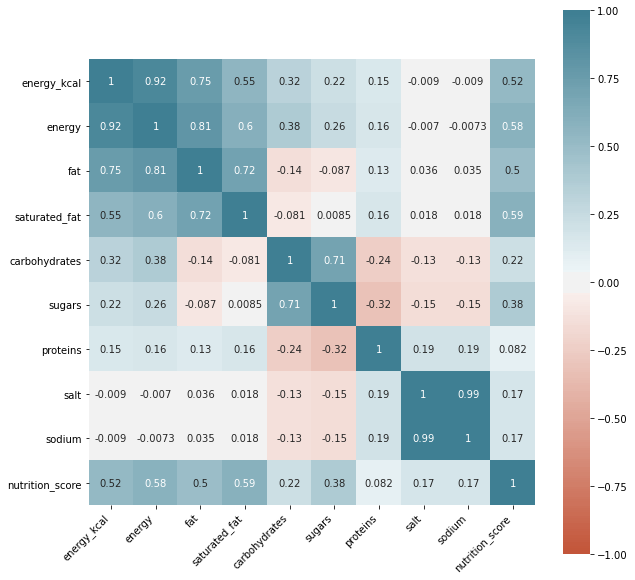

In [17]:
corr = df.select_dtypes('float').corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')


On peut remarquer que plusieurs variable sont en parfaite corrélation :
<ul>
<li>energy_kcal_100g & energy_100g
<li>salt & sodium
</ul>

Nous allons donc enlever energy_kcal_100 & le sodium pour le reste. 

### Statistiques

#### Test de shapiro pour savoir si la distribution est normale ou pas 

In [18]:
for col in df.select_dtypes('float'):
    shapiro_test = stats.shapiro(df[col])
    print(col, shapiro_test)

energy_kcal ShapiroResult(statistic=0.9463920593261719, pvalue=0.0)
energy ShapiroResult(statistic=0.9497745037078857, pvalue=0.0)
fat ShapiroResult(statistic=0.7736368775367737, pvalue=0.0)
saturated_fat ShapiroResult(statistic=0.6840200424194336, pvalue=0.0)
carbohydrates ShapiroResult(statistic=0.8373069167137146, pvalue=0.0)
sugars ShapiroResult(statistic=0.7065416574478149, pvalue=0.0)
proteins ShapiroResult(statistic=0.8400658965110779, pvalue=0.0)
salt ShapiroResult(statistic=0.31046098470687866, pvalue=0.0)
sodium ShapiroResult(statistic=0.30690300464630127, pvalue=0.0)
nutrition_score ShapiroResult(statistic=0.9745159149169922, pvalue=0.0)


C:\Users\matthieu.cazier\Anaconda3\envs\oc\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


les données ne suivent pas une distribution normale, le test anova aura moins d'impact 

#### Test Anova (moins impactant car la distribution n'est pas normale)

<ul>
<li>H1 : l'augmentation du sucre, gras ou énergie emmène une augmentation du nutriscore
<li>H2 : le carbohydrates ett les proteins n'ont pas de rôle à jouer dans le nutriscore
</ul>

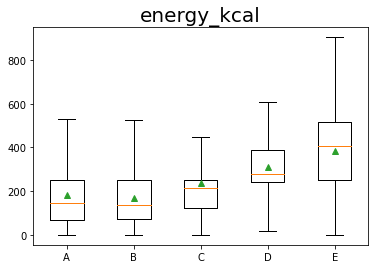

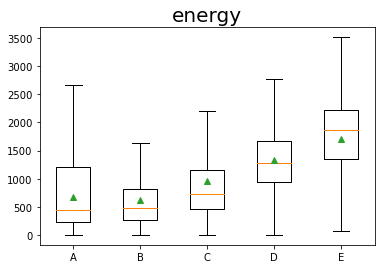

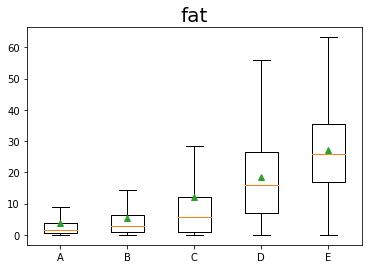

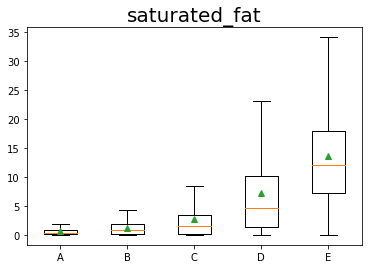

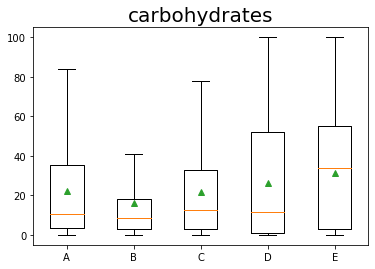

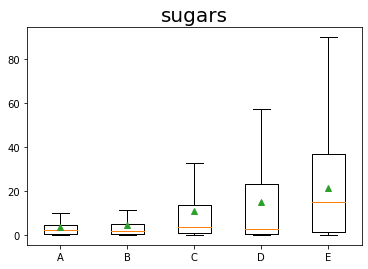

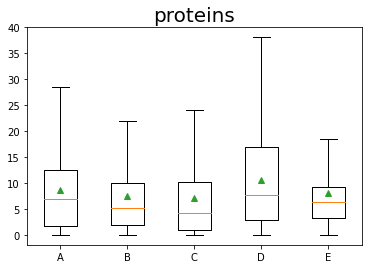

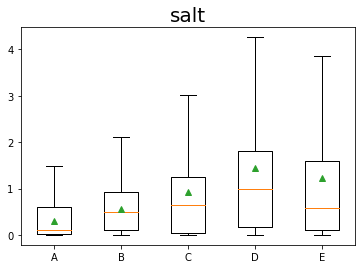

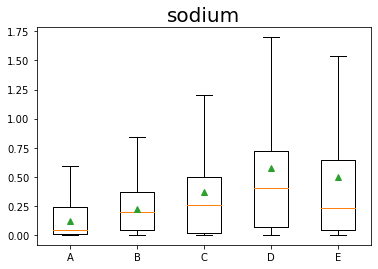

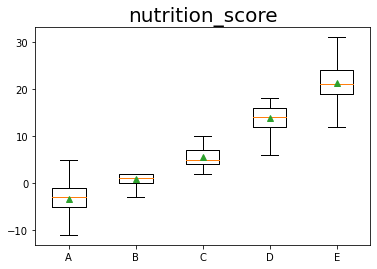

In [19]:
for col in df.select_dtypes('float'):
    fig = plt.figure()  
    ax = fig.add_subplot()
    ax.set_title(col, fontsize= 20)
    ax.set

    data = [df[col][df['nutriscore_grade'] == 'a'],
           df[col][df['nutriscore_grade'] == 'b'],
           df[col][df['nutriscore_grade'] == 'c'],
           df[col][df['nutriscore_grade'] == 'd'],
           df[col][df['nutriscore_grade'] == 'e']]
    
    ax.boxplot(data,labels= ['A', 'B', 'C','D','E'],showmeans= True,showfliers=False)

plt.show()

Calculer les p values pour avoir une réponse précise des différences

In [21]:
from scipy.stats import f_oneway
for col in df.select_dtypes('float'):
    print(col , f_oneway(df[col][df['nutriscore_grade'] == 'a'],df[col][df['nutriscore_grade'] == 'b'],df[col][df['nutriscore_grade'] == 'c'],df[col][df['nutriscore_grade'] == 'd'],df[col][df['nutriscore_grade'] == 'e']))

energy_kcal F_onewayResult(statistic=10713.699211562176, pvalue=0.0)
energy F_onewayResult(statistic=14471.666420249823, pvalue=0.0)
fat F_onewayResult(statistic=10898.041834762116, pvalue=0.0)
saturated_fat F_onewayResult(statistic=18782.24523004888, pvalue=0.0)
carbohydrates F_onewayResult(statistic=1587.1188358938612, pvalue=0.0)
sugars F_onewayResult(statistic=5670.330172336931, pvalue=0.0)
proteins F_onewayResult(statistic=1179.3692030685454, pvalue=0.0)
salt F_onewayResult(statistic=1425.7062994798016, pvalue=0.0)
sodium F_onewayResult(statistic=1408.6389866171955, pvalue=0.0)
nutrition_score F_onewayResult(statistic=419267.90217853145, pvalue=0.0)


#### Regression lineaire

In [22]:
from scipy import stats

energy_kcal pente: 0.026059    intercept: 2.337865  p_value 0.000000
R-squared: 0.267204


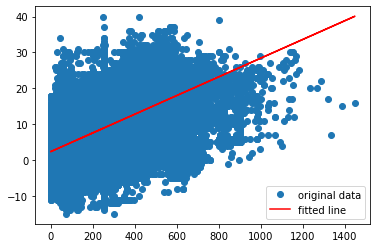

energy pente: 0.006469    intercept: 2.043644  p_value 0.000000
R-squared: 0.335539


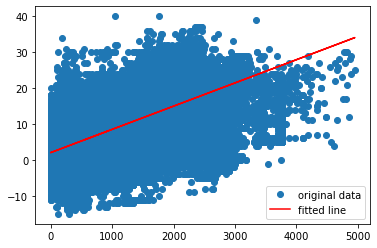

fat pente: 0.237828    intercept: 5.841775  p_value 0.000000
R-squared: 0.248128


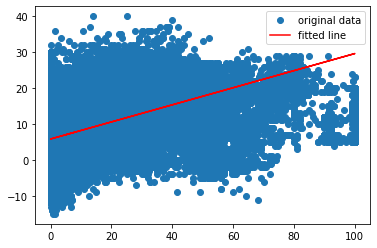

saturated_fat pente: 0.602304    intercept: 5.888114  p_value 0.000000
R-squared: 0.345257


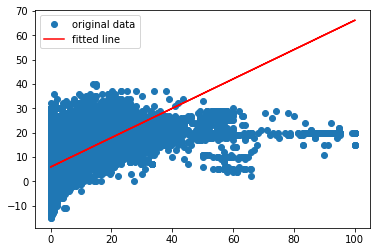

carbohydrates pente: 0.075384    intercept: 7.607210  p_value 0.000000
R-squared: 0.049915


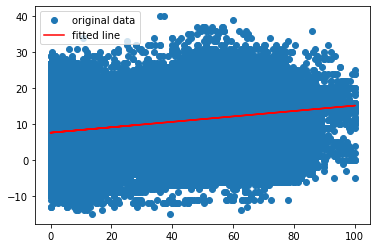

sugars pente: 0.180364    intercept: 7.189711  p_value 0.000000
R-squared: 0.143051


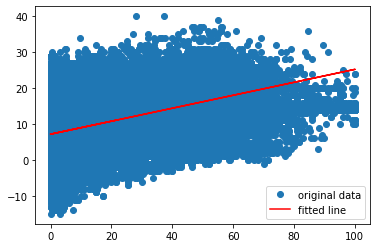

proteins pente: 0.083303    intercept: 8.719891  p_value 0.000000
R-squared: 0.006767


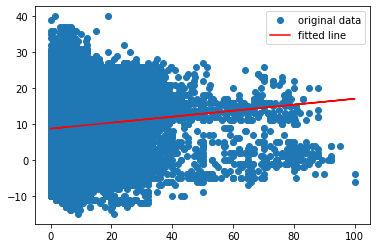

salt pente: 0.652237    intercept: 8.782353  p_value 0.000000
R-squared: 0.030286


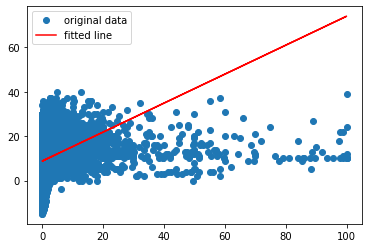

sodium pente: 1.607519    intercept: 8.791219  p_value 0.000000
R-squared: 0.029887


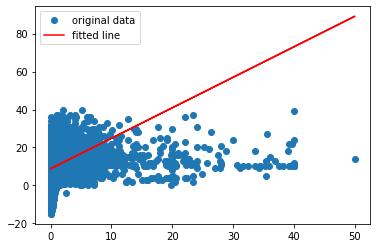

nutrition_score pente: 1.000000    intercept: 0.000000  p_value 0.000000
R-squared: 1.000000


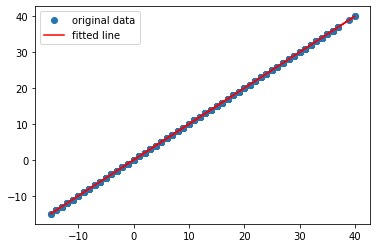

In [23]:
for col in df.select_dtypes('float'):  
    x = df[col]
    y = df["nutrition_score"]

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(col,"pente: %f    intercept: %f  p_value %f" % (slope, intercept, p_value))
    print("R-squared: %f" % r_value**2)

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.legend()
    plt.show()

In [24]:
a_df = df[df['nutriscore_grade'] == 'a']
b_df = df[df['nutriscore_grade'] == 'b']
c_df = df[df['nutriscore_grade'] == 'c']
d_df = df[df['nutriscore_grade'] == 'd']
e_df = df[df['nutriscore_grade'] == 'e']

In [25]:
print(a_df.shape)
print(b_df.shape)
print(c_df.shape)
print(d_df.shape)
print(e_df.shape)

(25228, 11)
(23856, 11)
(39718, 11)
(56129, 11)
(37331, 11)


In [26]:
a_df = a_df.sample(len(b_df))
b_df = b_df.sample(len(b_df))
c_df = c_df.sample(len(b_df))
d_df = d_df.sample(len(b_df))
e_df = e_df.sample(len(b_df))

#### Test de mannwhitney pour non paramétrique

In [27]:
import scipy.stats as stat


In [28]:
for col in df.select_dtypes('float'):
    print(col,{"A-B"},stat.mannwhitneyu(a_df[col],b_df[col]))
    print(col,{"A-C"}, stat.mannwhitneyu(a_df[col],c_df[col]))
    print(col,{"A-D"}, stat.mannwhitneyu(a_df[col],d_df[col]))
    print(col,{"A-E"}, stat.mannwhitneyu(a_df[col],e_df[col]))
    print(col,{"B-C"}, stat.mannwhitneyu(b_df[col],c_df[col]))
    print(col,{"B-D"}, stat.mannwhitneyu(b_df[col],d_df[col]))
    print(col,{"B-E"}, stat.mannwhitneyu(b_df[col],e_df[col]))
    print(col,{"C-D"}, stat.mannwhitneyu(c_df[col],d_df[col]))
    print(col,{"C-E"}, stat.mannwhitneyu(c_df[col],e_df[col]))
    print(col,{"D-E"}, stat.mannwhitneyu(d_df[col],e_df[col]))
    print("\n")

energy_kcal {'A-B'} MannwhitneyuResult(statistic=263558737.5, pvalue=6.839016929007322e-45)
energy_kcal {'A-C'} MannwhitneyuResult(statistic=240735879.5, pvalue=4.405497660507607e-188)
energy_kcal {'A-D'} MannwhitneyuResult(statistic=146479312.5, pvalue=0.0)
energy_kcal {'A-E'} MannwhitneyuResult(statistic=112506480.5, pvalue=0.0)
energy_kcal {'B-C'} MannwhitneyuResult(statistic=214848461.5, pvalue=0.0)
energy_kcal {'B-D'} MannwhitneyuResult(statistic=117693600.5, pvalue=0.0)
energy_kcal {'B-E'} MannwhitneyuResult(statistic=98824039.5, pvalue=0.0)
energy_kcal {'C-D'} MannwhitneyuResult(statistic=172973152.0, pvalue=0.0)
energy_kcal {'C-E'} MannwhitneyuResult(statistic=141490308.5, pvalue=0.0)
energy_kcal {'D-E'} MannwhitneyuResult(statistic=198099346.5, pvalue=0.0)


energy {'A-B'} MannwhitneyuResult(statistic=277794819.0, pvalue=3.500453351541433e-06)
energy {'A-C'} MannwhitneyuResult(statistic=212546977.0, pvalue=0.0)
energy {'A-D'} MannwhitneyuResult(statistic=124608439.5, pvalue=0.

des différences significative entre : 
<ul>
<li>gras saturé
<li>gras 
<li>énergy
<li>sucre et sels (moitié)
</ul>

### Prédictions

#### Creer un train & test set 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df = df.drop(['nutrition_score'],axis=1)  ###comme il y a une corélation parfaite inutile de le mettre

In [36]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

#### Vérifier le découpage

In [37]:
trainset['nutriscore_grade'].value_counts()

d    44645
c    31819
e    30058
a    20180
b    19107
Name: nutriscore_grade, dtype: int64

In [38]:
testset['nutriscore_grade'].value_counts()

d    11484
c     7899
e     7273
a     5048
b     4749
Name: nutriscore_grade, dtype: int64

#### Encodage 

In [39]:
def encodage(df):              ##ne plus avoir de valeur de types : objet
    code = {'a':0,
            'b':0,
            'c':1,
            'd':1,
            'e':1}
            
    for col in df.select_dtypes('object').columns:
        df.loc[:,col]=df[col].map(code)
        
    return df

In [40]:
def imputation (df):
    return df.dropna(axis=0)

In [41]:
def preprocessing(df):

    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('nutriscore_grade', axis=1)
    y = df['nutriscore_grade']
    
    print(y.value_counts())
    
    return X, y

In [42]:
X_train, y_train = preprocessing(trainset)

1    106522
0     39287
Name: nutriscore_grade, dtype: int64


C:\Users\matthieu.cazier\Anaconda3\envs\oc\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
X_test, y_test = preprocessing(testset)

1    26656
0     9797
Name: nutriscore_grade, dtype: int64


#### Modélisation

In [44]:
from sklearn.tree import DecisionTreeClassifier           ##essayer avec autre model
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = DecisionTreeClassifier(random_state=0)

In [51]:
model1 = RandomForestClassifier(max_depth=2, random_state=0)

#### Procédure d'évaluation

In [60]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix

In [78]:
def evaluation(model): 
    
    model = model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    #print(confusion_matrix(y_test,ypred))
    #print(classification_report(y_test, ypred))
    
    print(model)
    print('\n')
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
    
    
    
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.title(model)
    plt.plot(N,train_score.mean(axis=1),label='train_score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()


RandomForestClassifier(max_depth=2, random_state=0)


Confusion matrix, without normalization
[[ 5072  4725]
 [ 1504 25152]]
Normalized confusion matrix
[[0.5177095  0.4822905 ]
 [0.05642257 0.94357743]]


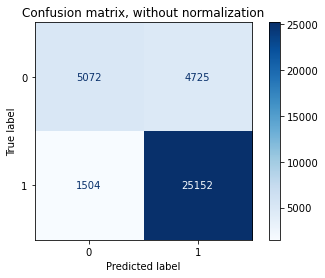

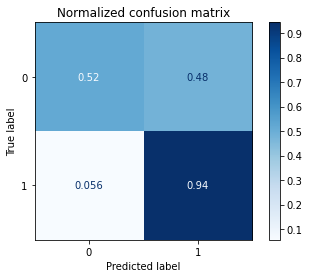

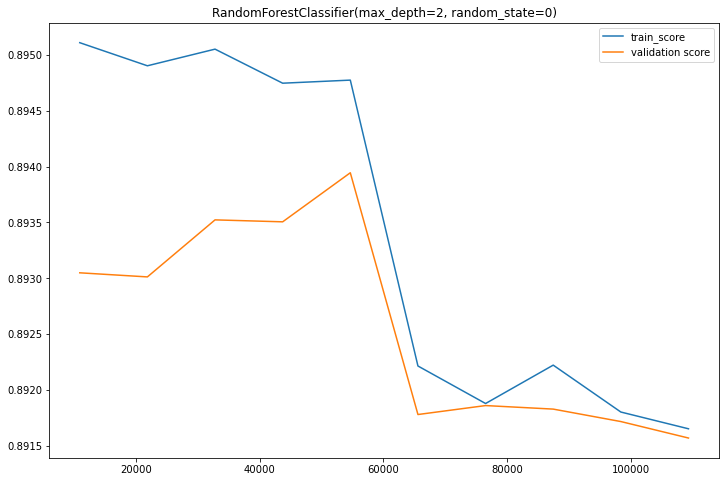

In [80]:
evaluation(model1)

DecisionTreeClassifier(random_state=0)


Confusion matrix, without normalization
[[ 8682  1115]
 [ 1194 25462]]
Normalized confusion matrix
[[0.88618965 0.11381035]
 [0.04479292 0.95520708]]


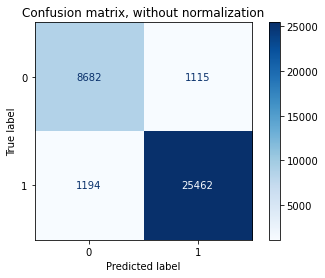

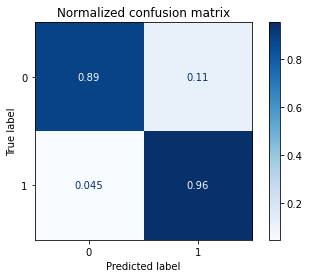

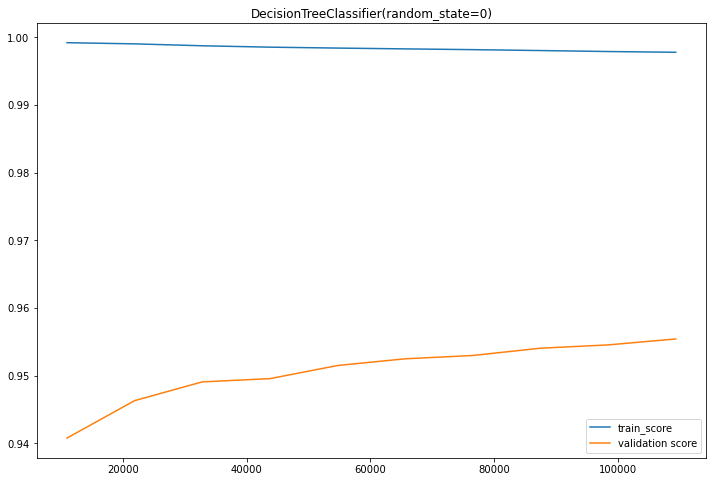

In [79]:
evaluation(model)